<a href="https://colab.research.google.com/github/pratikasarkar/Supervised-Learning---Classification/blob/master/Classification_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Univariate Analysis

In [0]:
df = pd.DataFrame({'bmi' : [4.5,5.8,6.5,7.0,5.0,6.0,8.6],
                'glucose' :[190,220,280,320,200,250,380]})

In [3]:
df

,bmi,glucose
0,4.5,190
1,5.8,220
2,6.5,280
3,7.0,320
4,5.0,200
5,6.0,250
6,8.6,380


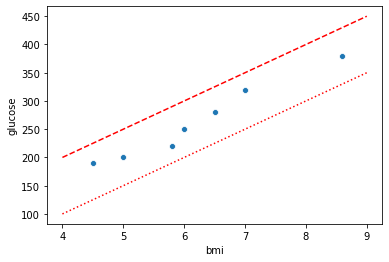

In [4]:
sns.scatterplot(df['bmi'],df['glucose'])
plt.plot([4,9],[200,450],color = 'r',linestyle = 'dashed')
plt.plot([4,9],[100,350],color = 'r',linestyle = 'dotted')

glucose = beta0 + beta1 * bmi

y -> actual points 

y' -> predicted points on the line

residual = y - y'

The difference between actual(y) and the predicted(y') is called a residual

For dashed line, all residuals will be negative.

For dotted line, all residuals will be positive.

beta1 = covariance of X and y divided by variance of X

beta1 = cov(X,y)/var(X)

cov(X,y) = sum_1_to_n((X-Xbar)(y-ybar))/n-1

var(X) = sum_1_to_n((X-Xbar)**2)/n-1

beta0 = ybar - beta1 * Xbar

In [0]:
n_bmi = len(df['bmi'])
n_glucose = len(df['glucose'])

In [0]:
cov_bmi_glu = np.sum((df['bmi'] - np.mean(df['bmi']))*(df['glucose'] - np.mean(df['glucose'])))/(n_bmi-1)

In [0]:
var_bmi = np.sum((df['bmi'] - np.mean(df['bmi']))**2)/(n_bmi-1)

In [0]:
beta1 = cov_bmi_glu/var_bmi

In [9]:
beta1

50.00000000000001

In [0]:
ybar = np.mean(df['glucose'])
Xbar = np.mean(df['bmi'])

In [0]:
beta0 = ybar - beta1 * Xbar

In [12]:
beta0

-47.142857142857224

In [0]:
glu_predict = beta0 + beta1 * df['bmi']

In [14]:
glu_predict

0    177.857143
1    242.857143
2    277.857143
3    302.857143
4    202.857143
5    252.857143
6    382.857143
Name: bmi, dtype: float64

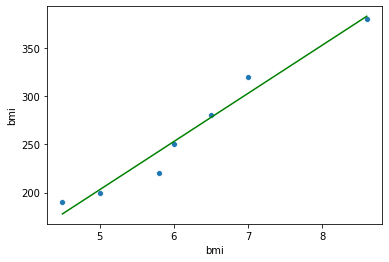

In [15]:
sns.scatterplot(df['bmi'],df['glucose'])
sns.lineplot(df['bmi'],glu_predict,color = 'g')

### Verification using the sklearn model

In [0]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [17]:
lr.fit(df[['bmi']],df['glucose'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
lr.coef_

array([50.])

In [19]:
lr.intercept_

-47.14285714285728

In [20]:
lr.predict(df[['bmi']])

array([177.85714286, 242.85714286, 277.85714286, 302.85714286,
       202.85714286, 252.85714286, 382.85714286])

For feature selection, correlation matrix will just give us how strongly the variables are correlated with each other, but the final decision whether to keep a variable or drop a variable should be taken by p-value in the ols summary.

For Regreesion model, we calculate the measures like rmse, r-squared and adjusted rsquared.

For binary classification, we calculate accuracy,confusion matrix,classification report and ROC AUC curve.

For multiclass classification, we calculate accuracy,confusion matrix,classification report and f1-score.

##### We will be working on differnt models for regression and classification, but we need to choose the best model for our clients. 

##### So for final performance validation, for regression we use RMSE.

##### For binary classification we use AUC and for multiclass classification we use F1-SCORE

# Adding a categorical value for y (dependent variable)

In [0]:
df['outcome'] = [0,0,1,1,0,0,1]

In [22]:
df

,bmi,glucose,outcome
0,4.5,190,0
1,5.8,220,0
2,6.5,280,1
3,7.0,320,1
4,5.0,200,0
5,6.0,250,0
6,8.6,380,1


In [0]:
n_outcome = len(df['outcome'])

In [0]:
cov_bmi_outcome = np.sum((df['bmi'] - np.mean(df['bmi']))*(df['outcome'] - np.mean(df['outcome'])))/(n_bmi-1)

In [0]:
beta1 = cov_bmi_outcome/var_bmi

In [26]:
beta1

0.3176043557168785

In [0]:
ybar = np.mean(df['outcome'])
Xbar = np.mean(df['bmi'])

In [0]:
beta0 = ybar - beta1 * Xbar

In [29]:
beta0

-1.540575576873218

In [0]:
outcome_predict = beta0 + beta1 * df['bmi']

In [31]:
outcome_predict

0   -0.111356
1    0.301530
2    0.523853
3    0.682655
4    0.047446
5    0.365051
6    1.190822
Name: bmi, dtype: float64

## Squashing / Sigmoid / Logistic function

#### y = 1 / ( 1 + e^-(beta0 + beta1 * X) )

![alt text](https://upload.wikimedia.org/wikipedia/commons/8/88/Logistic-curve.svg)

In [32]:
outcome_pred_prob = 1/(1+ np.exp(-outcome_predict))
outcome_pred_prob

0    0.472190
1    0.574816
2    0.628048
3    0.664331
4    0.511859
5    0.590262
6    0.766888
Name: bmi, dtype: float64

In [33]:
outcome_pred = []
for val in outcome_pred_prob:
    if val > np.mean(outcome_pred_prob):
        outcome_pred.append(1)
    else:
        outcome_pred.append(0)
outcome_pred

[0, 0, 1, 1, 0, 0, 1]

In [34]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
df = pd.read_csv('/content/gdrive/My Drive/US_Heart_Patients.csv')

In [36]:
df.shape

(4240, 16)

In [0]:
import statsmodels.api as sm

In [38]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [40]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [0]:
df2 = df.dropna()

In [42]:
df.shape[0] - df2.shape[0]

582

In [43]:
df2.rename(columns={'male':'Gender'},inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


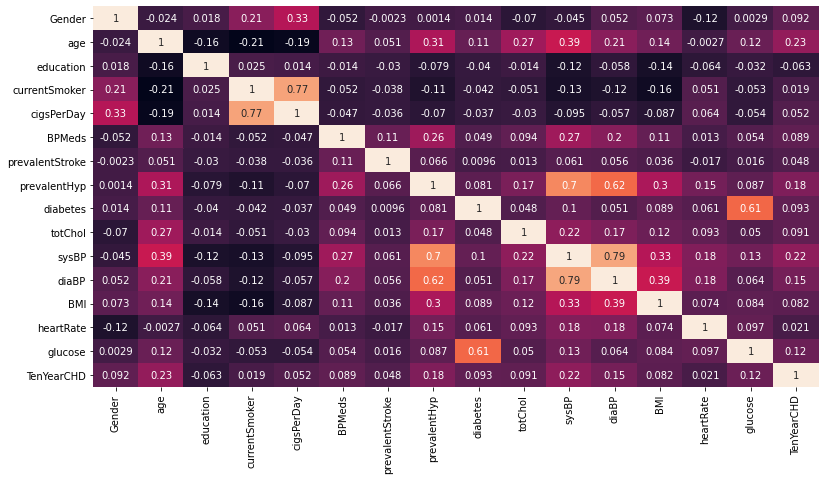

In [44]:
plt.figure(figsize=(13,7))
sns.heatmap(df2.corr(),annot = True,cbar=False)

In [0]:
X = df2.drop('TenYearCHD',axis=1)

In [46]:
X.shape

(3658, 15)

In [0]:
y = df2['TenYearCHD']

In [0]:
Xc = sm.add_constant(X)

In [49]:
model = sm.Logit(y,Xc).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.376500
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3658
Model:                          Logit   Df Residuals:                     3642
Method:                           MLE   Df Model:                           15
Date:                Thu, 23 Apr 2020   Pseudo R-squ.:                  0.1175
Time:                        01:25:35   Log-Likelihood:                -1377.2
converged:                       True   LL-Null:                       -1560.6
Covariance Type:            nonrobust   LLR p-value:                 6.676e-69
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.3282      0.715    -11.640      0.000      -9.730      -6.926
Gender              0.5553      0.109      5.093      0.000       0.342       0.769
age                 0.0635      0.007      9.509      0.000       0.050       0.077
education          -0.0478      0.049     -0.967      0.334      -0.145       0.049
currentSmoker       0.0716      0.157      0.457      0.648      -0.236       0.379
cigsPerDay          0.0179      0.006      2.872      0.004       0.006       0.030
BPMeds              0.1625      0.234      0.693      0.488      -0.297       0.622
prevalentStroke     0.6937      0.490      1.417      0.157      -0.266       1.653
prevalentHyp        0.2342      0.138      1.697      0.090      -0.036       0.505
diabetes            0.0392      0.316      0.124      0.901      -0.579       0.658
totChol             0.0023      0.001      2.070      0.038       0.000       0.005
sysBP               0.0154      0.004      4.044      0.000       0.008       0.023
diaBP              -0.0042      0.006     -0.646      0.518      -0.017       0.008
BMI                 0.0067      0.013      0.523      0.601      -0.018       0.032
heartRate          -0.0032      0.004     -0.771      0.441      -0.012       0.005
glucose             0.0071      0.002      3.190      0.001       0.003       0.012
===================================================================================
"""

In [0]:
def backward_elimination(df,target):
  X = df.drop(target,axis =1)
  Xc = sm.add_constant(X)
  remaining_cols = list(Xc.columns)
  y = df[target]
  while len(remaining_cols) > 0 : 
    X_temp = Xc[remaining_cols]
    model = sm.Logit(y,X_temp).fit()
    pvals = list(model.pvalues)
    max_pval = max(pvals)
    max_pval_feature = model.pvalues.idxmax()
    if max_pval > 0.03:
      remaining_cols.remove(max_pval_feature)
      print(max_pval_feature,max_pval)
    else:
      break
  return remaining_cols

In [51]:
impt_features = backward_elimination(df2,'TenYearCHD')

Optimization terminated successfully.
         Current function value: 0.376500
         Iterations 7
diabetes 0.9012045780435511
Optimization terminated successfully.
         Current function value: 0.376502
         Iterations 7
currentSmoker 0.64836503909236
Optimization terminated successfully.
         Current function value: 0.376531
         Iterations 7
BMI 0.6296050439469527
Optimization terminated successfully.
         Current function value: 0.376562
         Iterations 7
diaBP 0.5625804781393751
Optimization terminated successfully.
         Current function value: 0.376608
         Iterations 7
BPMeds 0.4697715086532108
Optimization terminated successfully.
         Current function value: 0.376679
         Iterations 7
heartRate 0.41602841295529747
Optimization terminated successfully.
         Current function value: 0.376770
         Iterations 7
education 0.3066346175601081
Optimization terminated successfully.
         Current function value: 0.376914
         Itera

In [52]:
impt_features

['const', 'Gender', 'age', 'cigsPerDay', 'sysBP', 'glucose']

In [53]:
model = sm.Logit(y,Xc[impt_features]).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.378192
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3658
Model:                          Logit   Df Residuals:                     3652
Method:                           MLE   Df Model:                            5
Date:                Thu, 23 Apr 2020   Pseudo R-squ.:                  0.1135
Time:                        01:25:36   Log-Likelihood:                -1383.4
converged:                       True   LL-Null:                       -1560.6
Covariance Type:            nonrobust   LLR p-value:                 2.041e-74
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.7081      0.421    -20.682      0.000      -9.533      -7.883
Gender         0.5312      0.106      5.032      0.000       0.324       0.738
age            0.0674      0.006     10.574      0.000       0.055       0.080
cigsPerDay     0.0195      0.004      4.683      0.000       0.011       0.028
sysBP          0.0180      0.002      8.413      0.000       0.014       0.022
glucose        0.0073      0.002      4.369      0.000       0.004       0.011
==============================================================================
"""

# Confusion Matrix
For a confusion matrix, the abonormility is considered as positive case and the opposite to abnormality is considered as negative case.

![alt text](https://2.bp.blogspot.com/-EvSXDotTOwc/XMfeOGZ-CVI/AAAAAAAAEiE/oePFfvhfOQM11dgRn9FkPxlegCXbgOF4QCLcBGAs/s1600/confusionMatrxiUpdated.jpg)

# Pseudo R-square (Used Rarely)

![alt text](https://thestatsgeek.com/wp-content/ql-cache/quicklatex.com-5131a3908febd4a52f24c502dd3a83c4_l3.svg)

Numerator : Log of Likelihood  when all the features are taken into consideration

Denominator : Log of Likelihood  when none of the features are taken into consideration. (The null model will classify all the records to the class with higher probability)

So according to our model : 

Pseudo R-square =  1 - [ (-1381.4)/(-1560.6) ] = 0.1148

MAXIMUM VALUE OF PSEUDO R_SQUARE IS AROUND 0.4

In [0]:
impt_features.remove('const')

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X[impt_features],y,test_size = 0.3,random_state = 0)

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test,y_pred)
print(accuracy * 100)
cm = metrics.confusion_matrix(y_test,y_pred)
print(cm)

84.15300546448088
[[907   9]
 [165  17]]


### Confusion Matrix :

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;***Actual***

***Predicted*** [ TN &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; FP/alpha/type1 error

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;FN/beta/type2 error &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; TP]



*   Alpha/ Type1 Error/ False Positive rate = FP/FP+TN
*   Beta/ Type2 Error/ False Negative Rate = FN/FN+TP
*   1- Alpha/ True Negative Rate/ Specificity = TN/TN+FP
*   1- Beta/ True Positive Rate/ Sensitivity/Recall = TP/TP+FN

In [57]:
print('TPR/Sensitivity/Recall : ',17/182)
print('Using metrics : ',metrics.recall_score(y_test,y_pred))

TPR/Sensitivity/Recall :  0.09340659340659341
Using metrics :  0.09340659340659341


In [58]:
print('TNR/Specificity : ',907/916)

TNR/Specificity :  0.990174672489083


In [59]:
model.coef_

array([[0.5213538 , 0.05738011, 0.01798024, 0.01886123, 0.00915603]])

In [60]:
np.exp(model.coef_)

array([[1.68430632, 1.05905829, 1.01814286, 1.01904022, 1.00919807]])

In [0]:
backpain_df = pd.read_csv('/content/gdrive/My Drive/backpain - backpain.csv')

In [62]:
backpain_df.head()

,pelvic_incidence,pelvictilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Status
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


In [63]:
backpain_df['Status'].value_counts()

Abnormal    210
Normal      100
Name: Status, dtype: int64

In [0]:
backpain_df['Status'].replace({'Abnormal':1,'Normal':0},inplace = True)

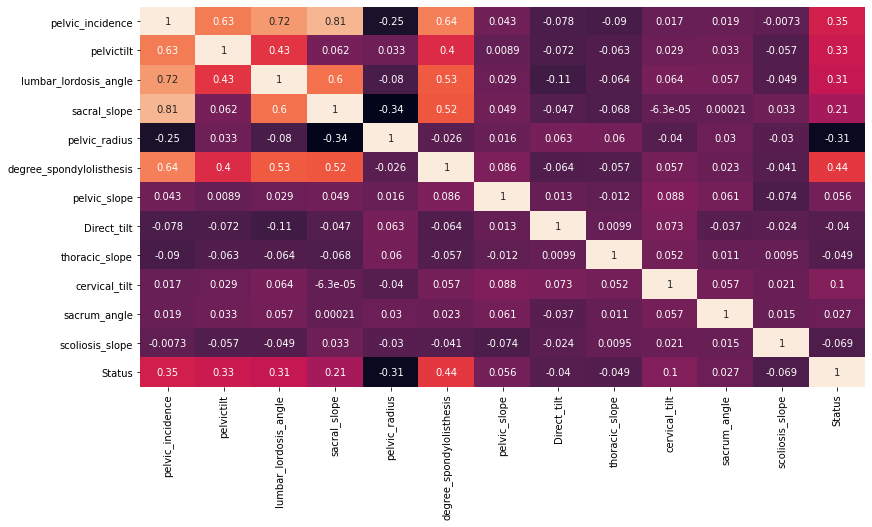

In [65]:
plt.figure(figsize=(13,7))
sns.heatmap(backpain_df.corr(),annot = True,cbar=False)

In [66]:
X = backpain_df.drop('Status',axis = 1)
y = backpain_df['Status']
Xc = sm.add_constant(X)
model = sm.Logit(y,Xc).fit()
model.summary()

         Current function value: 0.284109
         Iterations: 35


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Status   No. Observations:                  310
Model:                          Logit   Df Residuals:                      297
Method:                           MLE   Df Model:                           12
Date:                Thu, 23 Apr 2020   Pseudo R-squ.:                  0.5482
Time:                        01:25:37   Log-Likelihood:                -88.074
converged:                      False   LL-Null:                       -194.93
Covariance Type:            nonrobust   LLR p-value:                 4.778e-39
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       15.1816      3.554      4.271      0.000       8.215      22.148
pelvic_incidence             4.6895   1.38e+05   3.41e-05      1.000    -2.7e+05     2.7e+05
pelvictilt                  -4.6083   1.38e+05  -3.35e-05      1.000    -2.7e+05     2.7e+05
lumbar_lordosis_angle       -0.0221      0.023     -0.948      0.343      -0.068       0.024
sacral_slope                -4.7842   1.38e+05  -3.48e-05      1.000    -2.7e+05     2.7e+05
pelvic_radius               -0.1054      0.023     -4.484      0.000      -0.151      -0.059
degree_spondylolisthesis     0.1709      0.024      7.196      0.000       0.124       0.217
pelvic_slope                -0.2188      0.688     -0.318      0.750      -1.567       1.130
Direct_tilt                  0.0137      0.023      0.587      0.557      -0.032       0.059
thoracic_slope              -0.0522      0.058     -0.902      0.367      -0.166       0.061
cervical_tilt                0.0496      0.066      0.747      0.455      -0.081       0.180
sacrum_angle                 0.0049      0.016      0.311      0.756      -0.026       0.036
scoliosis_slope             -0.0098      0.019     -0.527      0.598      -0.046       0.027
============================================================================================

Possibly complete quasi-separation: A fraction 0.12 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [67]:
backward_elimination(backpain_df,'Status')

         Current function value: 0.284109
         Iterations: 35
pelvictilt 0.9999732661799048
Optimization terminated successfully.
         Current function value: 0.284109
         Iterations 9
sacrum_angle 0.7561508115923491
Optimization terminated successfully.
         Current function value: 0.284265
         Iterations 9
pelvic_slope 0.7765062744532797
Optimization terminated successfully.
         Current function value: 0.284395
         Iterations 9
scoliosis_slope 0.6078216638197805
Optimization terminated successfully.
         Current function value: 0.284820
         Iterations 9
Direct_tilt 0.5088302706897315
Optimization terminated successfully.
         Current function value: 0.285529
         Iterations 9
cervical_tilt 0.4065543756139306
Optimization terminated successfully.
         Current function value: 0.286646
         Iterations 9
thoracic_slope 0.4633299601764963
Optimization terminated successfully.
         Current function value: 0.287518
         Iterat

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


['const',
 'pelvic_incidence',
 'sacral_slope',
 'pelvic_radius',
 'degree_spondylolisthesis']

In [0]:
X_final = Xc[['pelvic_incidence',
 'sacral_slope',
 'pelvic_radius',
 'degree_spondylolisthesis']]
Y = y

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_final,Y,test_size = 0.3,random_state = 0)

In [0]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)

In [71]:
log_reg.coef_

array([[ 0.0543883 , -0.17636683, -0.12346274,  0.19020728]])

In [72]:
log_reg.intercept_

array([17.43144677])

In [73]:
accuracy = metrics.accuracy_score(y_test,y_pred)
print(accuracy * 100)
cm = metrics.confusion_matrix(y_test,y_pred)
print(cm)

82.79569892473118
[[25  5]
 [11 52]]


In [74]:
print('TPR/Sensitivity/Recall : ',52/63)
print('Using metrics : ',metrics.recall_score(y_test,y_pred))

TPR/Sensitivity/Recall :  0.8253968253968254
Using metrics :  0.8253968253968254


In [75]:
print('TNR/Specificity : ',25/30)

TNR/Specificity :  0.8333333333333334


# Overfitting vs Undefitting vs Ideal Model

![alt text](https://miro.medium.com/max/1000/1*i5BamDkqO1dnGxBVaTHtHw.png)

Model 1 : High training error and high testing error

Model 2 : Low training error and high testing error

Model 3 : Low training error and low testing error (Rightly fit model)

# For Classifiction Model

p = 1 / ( 1 + e^-(beta0 + beta1 * X) )

y = threshold(p)

Let,

z = beta0 + beta1 * X

y_prob = 1 / ( 1 + e^-(z) ) = e^z / ( 1 + e^z )

For interpretation of the above equation:

**p / (1 - p)** = e^z / ( 1 + e^z ) / 1 - (e^z / ( 1 + e^z )) = **e^z**

p / (1 - p) --> ODDS (prob of success / prob of failure)

log(ODDS) = log(p / (1 - p)) = log(e^z) = z --> beta0 + beta1 * X

In [76]:
np.exp(log_reg.coef_)

array([[1.05589453, 0.83831041, 0.88385458, 1.20950028]])

In [77]:
['pelvic_incidence',
 'sacral_slope',
 'pelvic_radius',
 'degree_spondylolisthesis']

['pelvic_incidence',
 'sacral_slope',
 'pelvic_radius',
 'degree_spondylolisthesis']

Every 1 unit increase in the pelvic incidence contributes to 5.58% increase in probablitiy of Abnormility.

Every 1 unit increase in the sacral slope contributes to 16.16% decrease in probablitiy of Abnormality.

Every 1 unit increase in the degree_spondylolisthesis contributes to 21% increase in probablitiy of Abnormility.

Every 1 unit increase in the pelvic radius contributes to 11.7% decrease in probablitiy of Abnormality.

## Cost function for Classification models

**Log loss :** 

The summation of log loss should be minimal.

Measure of uncertainity/ Entropy calculation

Entropy :

![alt text](https://www.saedsayad.com/images/Entropy_3.png)

**Cost function of Classification --> min( sum(log loss) )**

# Decision Trees

![alt text](https://46gyn61z4i0t1u1pnq2bbk2e-wpengine.netdna-ssl.com/wp-content/uploads/2018/07/decision-tree.png)

In [0]:
df_dt = pd.DataFrame({'ID' : ['s1','s2','s3','s4','s5','s6','s7'],
                      'Salary ($1000)': [15,17,28,10,40,50,55],
                      'Age (yrs)': [28,25,30,35,38,32,40],
                      'Loan Defaulter' : [1,0,1,1,0,1,0]})

In [79]:
df_dt

,ID,Salary ($1000),Age (yrs),Loan Defaulter
0,s1,15,28,1
1,s2,17,25,0
2,s3,28,30,1
3,s4,10,35,1
4,s5,40,38,0
5,s6,50,32,1
6,s7,55,40,0


Assume the root node is a null model.

So y_pred = [1,1,1,1,1,1,1]

and y = [1,0,1,1,0,1,0]

p1 = 4/7 --> as 4 of then have been correctly classified.

p0 = 3/7 --> as 3 of then have been incorrectly classified.

Entropy = - [ ( (4/7) * log(4/7) ) + ( (3/7) * log(3/7) ) ] = 0.9857



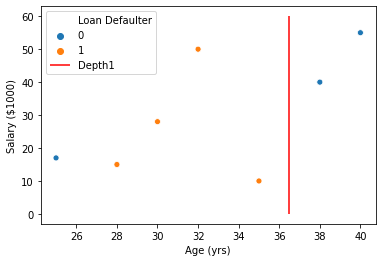

In [80]:
sns.scatterplot(df_dt['Age (yrs)'], df_dt['Salary ($1000)'], hue = df_dt['Loan Defaulter'])
plt.vlines(36.5,ymin = 0 , ymax = 60,label = 'Depth1',color = 'red')
plt.legend()

### Depth level 1

node1 -> { s1,s2,s3,s4,s6 } --> s2 misclassified {Still an impure node} 

**Entropy at node 1 :** 

p0 : 1/5 and p1 : 4/5

Entropy = - [ ( (4/5) * log(4/5) ) + ( (1/5) * log(1/5) ) ] = 0.7219

Assume we had got some entropy at node 2 as 0.315,

So summation of both entropies would be 1.0369 which is not expected. Our summation of the entropies of the nodes should be less than its root entropy. So we use **WEIGHTED ENTROPIES**.

*** Weighted Entropt of a node : entropy * (no. of points in current node/ no. of points in the root node) ***

Weighted Entropy for node 1 : 0.7219 * 5/7 = 0.5156

node2 -> { s5,s7 } --> no misclassification - {PURE Leaf} - Entropy/log loss is zero

So total entropy = 0.5156 + 0

Information gain = entropy(root node) - entropy(current node) = 0.9857 - 0.5156 = 0.4696

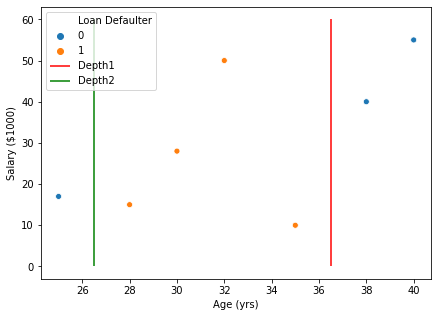

In [81]:
plt.figure(figsize = (7,5))
sns.scatterplot(df_dt['Age (yrs)'], df_dt['Salary ($1000)'], hue = df_dt['Loan Defaulter'])
plt.vlines(36.5,ymin = 0 , ymax = 60,label = 'Depth1',color = 'red')
plt.vlines(26.5,ymin = 0 , ymax = 60,label = 'Depth2',color = 'green')
plt.legend()

### Depth level 2

root_node -> { s1,s2,s3,s4,s6 }

node1 -> { s2 } --> no misclassification - {PURE Leaf} - Entropy/log loss is zero

node1 -> { s1,s3,s4,s6 } --> no misclassification - {PURE Leaf} - Entropy/log loss is zero

So total entropy = 0 + 0

Information gain = entropy(root node) - entropy(current node) = 0.5156 - 0 = 0.5156

**A fully grown decision tree is always overfit.**

### Decision Tree as a Regressor

In [0]:
df_dtr = pd.DataFrame({'ID' : ['s1','s2','s3','s4','s5','s6','s7','s8','s9','s10'],
                       'Ht' : [152,180,167,175,142,172,160,172,165,167],
                       'Age' : [45,26,30,34,40,36,19,28,23,32],
                       'Wt' : [77,47,55,59,72,60,40,60,45,58]})

In [86]:
df_dtr

,ID,Ht,Age,Wt
0,s1,152,45,77
1,s2,180,26,47
2,s3,167,30,55
3,s4,175,34,59
4,s5,142,40,72
5,s6,172,36,60
6,s7,160,19,40
7,s8,172,28,60
8,s9,165,23,45
9,s10,167,32,58


Assume the root node is a null model.

So y_pred = ybar = [57.3,57.3,57.3,57.3,57.3,57.3,57.3,57.3,57.3,57.3]

and y = [77,47,55,59,72,60,40,60,45,58]

Cost function ---> MSE

MSE = 118.4

### Depth level 1 (Age > 35)

node1 -> { s2,s3,s4,s7,s8,s9,s10 }

ybar_node1 = 52

**MSE at node 1 :** 

MSE_node1 = 53.71

node2 -> { s1,s5,s6 }

ybar_node1 = 69.6

**MSE at node 2 :** 

MSE_node2 = 50.88

So total MSE = 53.71 + 50.88 = 104.5

Information gain = MSE(root node) - MSE(current node) = 118.4 - 104.5 = 13.9

### Depth level 2 (Height > 170)

node11 -> { s3,s7,s9,s10 }

ybar_node11 = 49.25

**MSE at node11 :** 

MSE_node11 = 53.25

node12 -> { s2,s4,s8 }

ybar_node12 = 55.3

**MSE at node12 :** 

MSE_node12 = 34.89

node21 -> { s1,s5 }

ybar_node21 = 74.5

**MSE at node21 :** 

MSE_node21 = 6.25

node22 -> { s6 }

ybar_node22 = 60

**MSE at node22 :** 

MSE_node22 = 0

So total MSE = 53.25 + 34.89 + 6.25 + 0 = 94.38

Information gain = MSE(root node) - MSE(current node) = 104.59 - 94.38 = 10.12